# Norms
## Introduction

A norm is a way to measure the size of a vector, a matrix, a tensor, or a function.

Norms are any functions that are characterized by the following properties:

1. Norms are non-negative values. If you think of the norms as a length, you easily see why it can’t be negative.

2. Norms are 0
 if and only if the vector is a zero vector

3. Norms respect the triangle inequity. See bellow.

4. $\left\Vert k⋅u\right\Vert=|k|⋅\left\Vert u\right\Vert$. The norm of a vector multiplied by a scalar is equal to the absolute value of this scalar multiplied by the norm of the vector.

It is usually written with two horizontal bars: $\left\Vert x \right\Vert$

### The triangle inequity

The norm of the sum of some vectors is less than or equal to the sum of the norms of these vectors.

$$\Vert u+v \Vert \le \Vert u \Vert + \Vert v \Vert$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
u = np.array([1, 6])
v = np.array([4, 2])
print(r'𝑢+𝑣={}'.format(u+v))
print(r'‖𝑢+𝑣‖={}'.format(np.linalg.norm(u+v)))
print(r'‖𝑢‖+‖𝑣‖={}'.format(np.linalg.norm(u)+np.linalg.norm(v)))

𝑢+𝑣=[5 8]
‖𝑢+𝑣‖=9.433981132056603
‖𝑢‖+‖𝑣‖=10.554898485297798


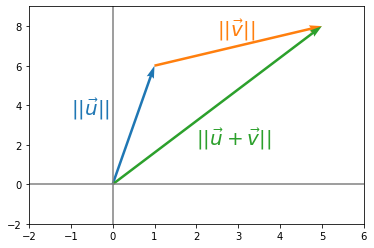

In [3]:
u = [0,0,1,6]
v = [0,0,4,2]
u_bis = [1,6,v[2],v[3]]
w = [0,0,5,8]
plt.quiver([u[0], u_bis[0], w[0]],
           [u[1], u_bis[1], w[1]],
           [u[2], u_bis[2], w[2]],
           [u[3], u_bis[3], w[3]],
           angles='xy', scale_units='xy', scale=1, color=sns.color_palette())
# plt.rc('text', usetex=True)
plt.xlim(-2, 6)
plt.ylim(-2, 9)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.text(-1, 3.5, r'$||\vec{u}||$', color=sns.color_palette()[0], size=20)
plt.text(2.5, 7.5, r'$||\vec{v}||$', color=sns.color_palette()[1], size=20)
plt.text(2, 2, r'$||\vec{u}+\vec{v}||$', color=sns.color_palette()[2], size=20)

plt.show()
plt.close()

Vector illustration of the triangle inequity. Geometrically, this simply means that the shortest path between two points is a line.

### P-norms: general rules

Here is the recipe to get the p-norm of a vector:

1. Calculate the absolute value of each element
2. Take the power $p$ of these absolute values
3. Sum all these powered absolute values
4. Take the power $1/p$ of this result

This is more condensly expressed with the formula:

$$\Vert v \Vert_p = \left[\sum_i |v_i|^p\right]^{1/p}$$

This will be clear with examples using these widely used p-norms.

#### $l^0$-Norm ($p=0$)

$l^0$-Norm is the number of non zero components. This norm has the problem, that is violates the 2nd property from above.

#### $l^1$-Norm ($p=1$)

$l^1$-Norm is the sum of absolute values: $\Vert v \Vert_1 = |v_1|+ \dots + |v_n|$. It plays a significant role in compressed sensing, signal processing etc.

#### $l^2$-Norm, Euclidean Norm ($p=2$)

$l^2$-Norm is the sum of squares: $\Vert v \Vert_2 = \sqrt{v_1^2+ \dots + v_n^2}$. 

#### $l^\infty$-Norm, Maximum Norm ($p=\infty$)

$l^\infty$-Norm is the maximum of the absolute values: $\Vert v \Vert_\infty = \max{|v_i|}$. 

Generally, $p$ can be any positive value $p\ge 1$. Prof Strang suggests [in his lecture](https://ocw.mit.edu/courses/mathematics/18-065-matrix-methods-in-data-analysis-signal-processing-and-machine-learning-spring-2018/) to visualize p-Norms as follows:

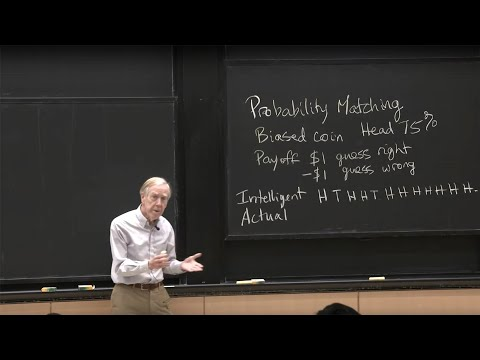

In [4]:
from IPython.display import YouTubeVideo
from datetime import timedelta

vid = YouTubeVideo("NcPUI7aPFhA", start=int(timedelta(hours=0, minutes=9, seconds=22).total_seconds()))
display(vid)

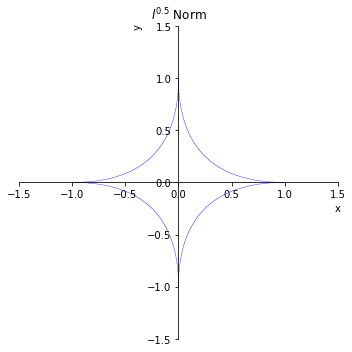

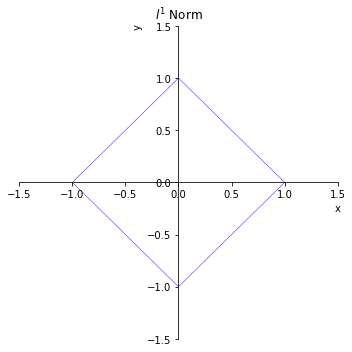

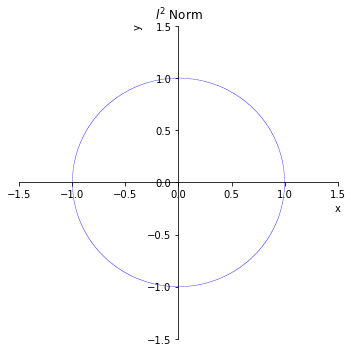

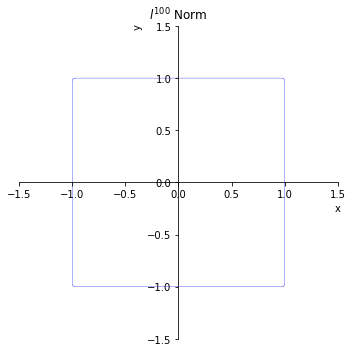

In [5]:
from sympy import *
x, y = symbols('x y')
def plot_p_norm(p,rhs=1):
    return plot_implicit(Eq(abs(x)**p + abs(y)**p, rhs), 
                         (x, -(rhs+.5), (rhs+.5)), 
                         (y, -(rhs+.5), (rhs+.5)),
                         title=r"$l^{{{}}}$ Norm".format(p),
                         size=(5,5),
                         show=False
                        )
plot_p_norm(0.5).show()
plot_p_norm(1).show()
plot_p_norm(2).show()
plot_p_norm(100).show()

A true Norm has a convex unit ball $\Vert x \Vert \le 1$. The first plot for $p=.5$ is concave. It's not a norm! 

## Vektor Norm
A generalisition of the p-Norm is
$$\Vert v \Vert_S=\sqrt{v^T S v}$$
where $S$ is a [positiv definit symmetric Matrix](https://ocw.mit.edu/courses/mathematics/18-065-matrix-methods-in-data-analysis-signal-processing-and-machine-learning-spring-2018/video-lectures/lecture-5-positive-definite-and-semidefinite-matrices). This can generate all Vector norms that are natural to use. 

A special case for $S=\mathbb{1}$ (identity matrix) is the p2-norm.

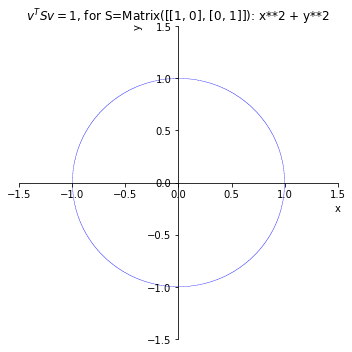

In [6]:
def plot_s_norm(S,rhs=1):
    v=Matrix([x, y])
    lhs=(v.T*S*v)[0] 
    return plot_implicit(Eq(lhs, rhs), 
                         (x, -(rhs+.5), (rhs+.5)), 
                         (y, -(rhs+.5), (rhs+.5)),
                         title=r"$v^TSv={}$, for S={}: {}".format(rhs,S,lhs),
                         size=(5,5),
                         show=False
                        )

plot_s_norm(Matrix([[1, 0], [0, 1]])).show()

For $S=\big(\begin{smallmatrix}
  2 & 0\\
  0 & 3
\end{smallmatrix}\big)$ 
we would get $2x^2+3y^2$, and that would be a weighted norm.

If we plot all of those norms equal to 1 in 2d we will get the ellipse $2x^2+3y^2=1$. 

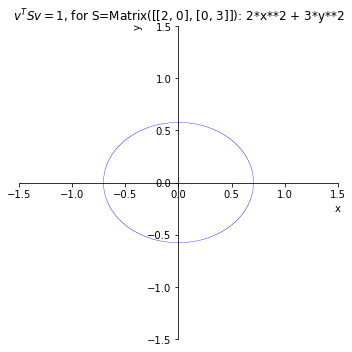

In [7]:
plot_s_norm(Matrix([[2, 0], [0, 3]])).show()

**Example:** Application in Optimization

We want to minimise the p-Norm of $x$, constrained by $Av=b$:
$$\min_{Av=b}\Vert v \Vert_p$$

One way of doing this is to blow up the norm (increase rhs) until it hits the constraint. The point where it hits is the minimum.

For our 2d example we use the constraint $y=-2/3*x+3$. 

Which point $(x,y)$ minimises the $l^1$ norm? The $l^1$ norm is the sparcest vector, so it's always on one of the axes. 

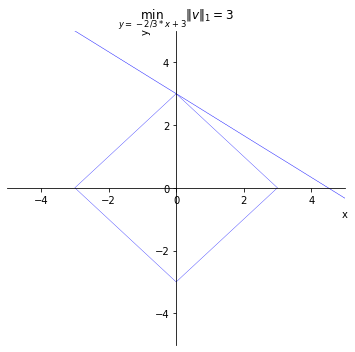

In [8]:
p1=plot_implicit(Eq(-2/3*x+3, y),
                 title=r"$\min_{y=-2/3*x+3}\Vert v \Vert_1=3$",
                 size=(5,5),
                 show=False)
p1.extend(plot_p_norm(1, 3))
p1.show()

Which point $(x,y)$ minimises the $l^2$ norm? The $l^2$ norm is how far out you go, so the radius of a circle. 

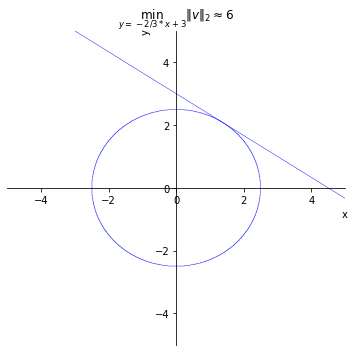

In [9]:
p1=plot_implicit(Eq(-2/3*x+3, y), 
                 title=r"$\min_{y=-2/3*x+3}\Vert v \Vert_2\approx 6$",
                 size=(5,5),
                 show=False)
p1.extend(plot_p_norm(2, (18/13)**2+(27/13)**2))
# p1.extend(plot_implicit(Eq(3/2*x, y),show=False))
p1.show()

## Matrix Norm

- $\Vert A \Vert_2=\sigma_1$: The **2 norm** of a matrix is the laggest [singular value of the matrix](https://ocw.mit.edu/courses/mathematics/18-065-matrix-methods-in-data-analysis-signal-processing-and-machine-learning-spring-2018/video-lectures/lecture-6-singular-value-decomposition-svd).
$$\Vert A \Vert_2=\max_{\text{all } x}\frac{\Vert Ax \Vert_2}{\Vert x \Vert_2}=\frac{\Vert Av_1 \Vert}{\Vert v_1 \Vert}=\sigma_1$$
where $v_1$ is the first right singular vektor, with $\Vert v_1 \Vert = 1$ and $Av_1=\sigma_1 u_1$.
- $\Vert A \Vert_F = \sqrt{\text{add all }\vert a_{ij} \vert^2}= \sqrt{\sigma_1^2+\dots+\sigma_r^2}$: The **Frobenius norm** of a matrix, considder singular value decomposition $A=U\Sigma V^T$, with $\Vert \Sigma \Vert_F=\sqrt{\sigma_1^2+\dots+\sigma_r^2}$.
- $\Vert A \Vert_N = \sigma_1+\dots\sigma_r$ The Nuckear Norm of a matrix, like $l_1$ norm

### Definition of a matrix norm:
The matrix norm of $A$ is the maximum over all unit vectors of the norm of $Ax$:
$$\Vert A \Vert = \max_{\Vert x\Vert=1}\Vert Ax \Vert$$
We have seen the visualization of the norm $\Vert x \Vert = 1$ above. Now we apply a martix transformation on $x$ and look for the maxima. 

**Example:** counterclockwise rotation by $\theta$ with rotation matrix:
$$A=
  \begin{bmatrix}
    \cos{\theta} &  -\sin{\theta}\\
    \sin{\theta} & \cos{\theta}
  \end{bmatrix}$$

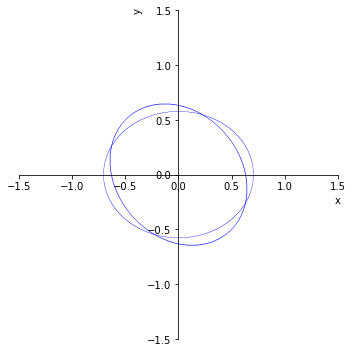

In [10]:
def plot_Ax_s_norm(A,S,rhs=1):
    v=A*Matrix([x, y])
    lhs=(v.T*S*v)[0] 
    return plot_implicit(Eq(lhs, rhs), 
                         (x, -(rhs+.5), (rhs+.5)), 
                         (y, -(rhs+.5), (rhs+.5)),
                         # title=r"$v^TSv={}$, for S={}: {}".format(rhs,S,lhs),
                         size=(5,5),
                         show=False
                        )
theta = np.pi/4 # 45 degree
p1 = plot_Ax_s_norm(Matrix([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]]),
               Matrix([[2, 0], [0, 3]]))
p1.extend(plot_s_norm(Matrix([[2, 0], [0, 3]])))
p1.show()

stretch by a factor k along the x-axis is given by:
$$A=
  \begin{bmatrix}
    k &  0\\
    0 & 1
  \end{bmatrix}$$

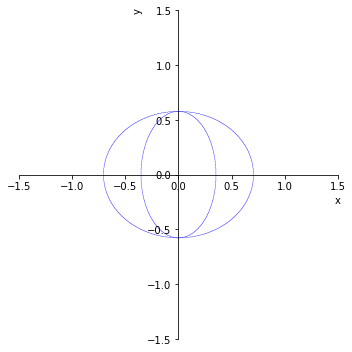

In [11]:
k = 2 # 2x strech along x-axis
p1 = plot_Ax_s_norm(Matrix([[k, 0], [0, 1]]),
               Matrix([[2, 0], [0, 3]]))
p1.extend(plot_s_norm(Matrix([[2, 0], [0, 3]])))
p1.show()